# Geog 573 (675) Advanced Geocomputing and Geospatial Big Data Analytics
## by Meiliu Wu (mwu233@wisc.edu)
## Lab3: Vector Computation and Spatial Clustering

# Geometric Computation

## How to caculate the area of a polygon 
https://www.wikihow.com/Calculate-the-Area-of-a-Polygon

In [45]:
import sys
import os
import math
import json

class Point:
    def __init__(self,x,y):
        self.lon = x
        self.lat = y
        
class Polyline:
    def __init__(self, points = []):
        self.points = points
        
    def getLength(self): # Euclidean distance
        Length = 0.0
        for i in range(len(self.points)-1):
            Length += math.sqrt((self.points[i+1].lon-self.points[i].lon)**2 +(self.points[i+1].lat-self.points[i].lat)**2)
        return Length

class Polygon:
    def __init__(self, points = []):
        self.points = points
        
    def getArea(self):
        # Implement the method here
        print("caculate the area of a polygon")
    
    def getCentroid(self):
        # Implement the method here
        print("get the centroid of a polygon")
        
    def getEnvelop(self):
        # Implement the method here
        print("get the minumum bounding envelop of a polygon")

if __name__ == "__main__":
    pointA=Point(0, 0)
    pointB=Point(3, 0)
    pointC=Point(3, 4)
    line1= Polyline([pointA,pointB,pointC])
    print ("length: ", line1.getLength())


('length: ', 7.0)


# Minimum Bounding Geometry
URL: https://pro.arcgis.com/en/pro-app/tool-reference/data-management/minimum-bounding-geometry.htm

## Convex Hull
Definition: a convex hull is a region where, for every pair of points within the region, every point on the straight line segment that joins the pair of points is also within the region or on the edge.

In [37]:
from IPython.display import Image
Image(url="https://cdncontribute.geeksforgeeks.org/wp-content/uploads/convexHull.jpg")

In [4]:
from IPython.display import Image
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Convex_polygon_illustration2.svg/330px-Convex_polygon_illustration2.svg.png")

Above figure: Illustration of a non-convex set. Since the red part of the (black and red) line-segment joining the points x and y lies outside of the (green) set, the region of this set is non-convex.

<b>QuickHull Algorithm: </b>
https://en.wikipedia.org/wiki/Quickhull <br>
https://www.geeksforgeeks.org/quickhull-algorithm-convex-hull/ <br>
(1)Find the points with minimum and maximum x coordinates, as these will always be part of the convex hull. <br>
(2)Use the line formed by the two points to divide the set in two subsets of points, which will be processed recursively. <br>

In [48]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Quickhull_example3.svg/440px-Quickhull_example3.svg.png")

(3)Determine the point, on one side of the line, with the maximum distance from the line. This point forms a triangle with those of the line. <br>
(4)The points lying inside of that triangle cannot be part of the convex hull and can therefore be ignored in the next steps. <br>

In [50]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Quickhull_example6.svg/440px-Quickhull_example6.svg.png")

(5)Repeat the previous two steps on the two lines formed by the triangle (not the initial line). <br>
(6)Keep on doing so on until no more points are left, the recursion has come to an end and the points selected constitute the convex hull. <br>

In [56]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Quickhull_example7.svg/440px-Quickhull_example7.svg.png")

## Well-know-text (WKT) representation of geometry
https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry <br>

## Another vector processing package: Shapely in addition to GDAL/OGR, ArcPy
https://github.com/Toblerity/Shapely

<b>Shapely</b> <br>
Shapely does manipulating and analyzing data. It’d based on GEOS, the standard library for doing that kind of thing, that is very fast. With Shapely, you can do things like buffers, unions, intersections, centroids, convex hulls, and lots more. It does it all quite efficiently.

<b>Fiona</b> <br>
Fiona does reading and writing data formats. For this it uses OGR, the most popular open-source geo-conversion system. 
https://github.com/Toblerity/Fiona

(array('d', [-1.0, -1.0, 1.0, 1.0, -1.0]), array('d', [-1.0, 1.0, 1.0, -1.0, -1.0]))


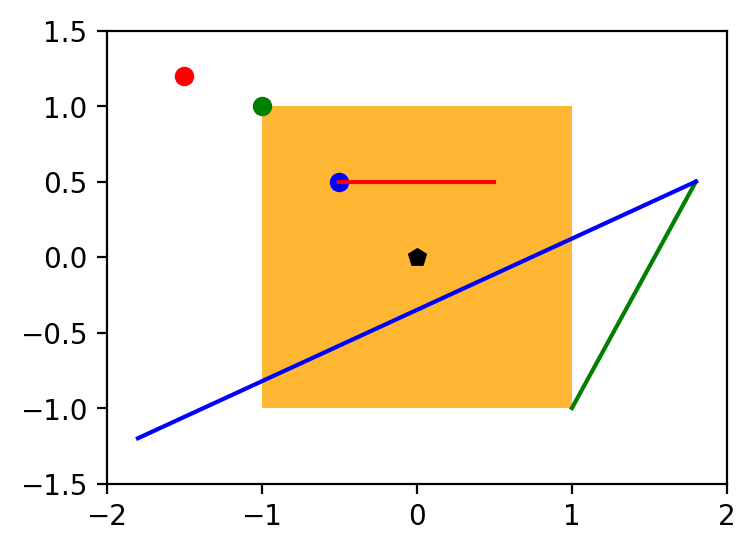

In [5]:
## draw WKT geometries 
from numpy import asarray
import pylab # python 3.x with newer version of matplotlib.pyplot
from shapely.geometry import Point, LineString, Polygon, mapping, shape
import json

point_r = Point(-1.5, 1.2)
point_g = Point(-1.0, 1.0)
point_b = Point(-0.5, 0.5)
point_s = shape(json.loads('{"type": "Point", "coordinates": [0.0, 0.0]}'))


line_r = LineString(((-0.5, 0.5), (0.5, 0.5)))
line_g = LineString(((1.0, -1.0), (1.8, 0.5)))
line_b = LineString(((-1.8, -1.2), (1.8, 0.5)))

polygon = Polygon(((-1.0, -1.0), (-1.0, 1.0), (1.0, 1.0), (1.0, -1.0)))

def plot_point(g, o): # more markers and colors at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
    pylab.plot([g.x], [g.y], o)

def plot_line(g, o):
    a = asarray(g)
    pylab.plot(a[:,0], a[:,1], o)

def fill_polygon(g, o):
    a = asarray(g.exterior) # extract the coordinates of a polygon
    pylab.fill(a[:,0], a[:,1], o, alpha=0.8) # using RGBA color model with alpha

def fill_multipolygon(g, o):
    for g in g.geoms:
        fill_polygon(g, o)

if __name__ == "__main__":
    fig = pylab.figure(1, figsize=(4, 3), dpi=200)
    pylab.axis([-2.0, 2.0, -1.5, 1.5]) 

    print (polygon.exterior.coords.xy) #print the coordinates of a polygon
    fill_polygon(polygon, 'orange')

    plot_point(point_r, 'ro') 
    plot_point(point_g, 'go')
    plot_point(point_b, 'bo')
    plot_point(point_s, 'kp')

    plot_line(line_r, 'r')
    plot_line(line_g, 'g')
    plot_line(line_b, 'b')

    pylab.show()

## Point in Polygon Check

In [8]:
# Check if a point is within or intersects the polygon using the within function
print(point_r.within(polygon))
print(point_g.within(polygon))
print(point_g.intersects(polygon))
print(point_b.intersects(polygon))
print(point_s.within(polygon))

False
False
True
True
True


# Read Shapefiles
(1) Read your shapefile with Fiona, OSGeo/OGR or any Python package using the geo_interface protocol (GeoJSON):

In [ ]:
import fiona
shape = fiona.open("my_shapefile.shp") #load your own shapefile
print (shape.schema)
#{'geometry': 'Polygon', 'properties': OrderedDict([(u'FID', 'float:11')])}
#first feature of the shapefile
first = shape.next()
print (first) #GeoJSON format

# or using OGR
from osgeo import ogr
file = ogr.Open("my_shapefile.shp")
shape = file.GetLayer(0)
#first feature of the shapefile
feature = shape.GetFeature(0)
first = feature.ExportToJson()
print (first) # (GeoJSON format)
#{"geometry": {"type": "LineString", "coordinates": [[0.0, 0.0], [25.0, 10.0], [50.0, 50.0]]}, "type": "Feature", "properties": {"FID": 0.0}}

(2) conversion to Shapely geometry (with the shape function)

In [ ]:
# now use the shape function of Shapely
from shapely.geometry import shape
shp_geom = shape(first['geometry'])
print (shp_geom)
LINESTRING (0 0, 25 10, 50 50)
print (type(shp_geom))
#<class 'shapely.geometry.linestring'>

(3) geo-computations (e.g., convexhull, buffer, joins, within, intersection, etc.)

# Reading JSON

In [71]:
import json
filename="geotweets.json" # change to your own tweet data
#Read JSON data into the datastore variable
if filename:
    with open(filename, 'r') as f:
        datastore = json.load(f)
print(datastore)

[{'contributors': None, 'truncated': True, 'text': 'Ah I see the trees think spring is arriving in Austin, whereas in Madison it will snow for 25 of the next 14 days.… https://t.co/6Wh5Po88AL', 'is_quote_status': False, 'in_reply_to_status_id': 1100158353198800897, 'id': 1100162505786171393, 'favorite_count': 6, 'entities': {'symbols': [], 'user_mentions': [], 'hashtags': [], 'urls': [{'url': 'https://t.co/6Wh5Po88AL', 'indices': [116, 139], 'expanded_url': 'https://twitter.com/i/web/status/1100162505786171393', 'display_url': 'twitter.com/i/web/status/1…'}]}, 'retweeted': False, 'coordinates': None, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_screen_name': 'PatrickIber', 'in_reply_to_user_id': 580437140, 'retweet_count': 0, 'id_str': '1100162505786171393', 'favorited': False, 'user': {'follow_request_sent': False, 'has_extended_profile': True, 'profile_use_background_image': False, 'default_profile_image': False, 'id': 5

## Spatial Clustering Analysis

## Variables in the 'georgia' data
#The georgia data include outlines of counties in Georgia with a number of attributes relating to 
#the 1990 census including population (TotPop90)
#the percentage of the population that are rural (PctRural)
#that have a college degree (PctBach)
#that are elderly (PctEld)
#that are foreign born (PctFB)
#that are classed as being in poverty (PctPov)
#that are black (PctBlack)
#the median income of the county (MedInc).


In [4]:
from osgeo import ogr
file = ogr.Open("georgia_wgs84.shp")
layer = file.GetLayer(0)
featureCount = layer.GetFeatureCount()
print("Number of features:",featureCount)
#first feature of the shapefile
feature = layer.GetFeature(0)
first = feature.ExportToJson()
print (first) # (GeoJSON format)

Number of features: 159
{"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[-82.2251968383789, 31.9128761291504], [-82.221305847168, 31.9125995635986], [-82.2187042236328, 31.9092998504639], [-82.206802368164, 31.9101009368896], [-82.2015075683594, 31.906099319458], [-82.1921997070312, 31.9062995910645], [-82.1915054321289, 31.9002990722656], [-82.1602020263672, 31.9037990570068], [-82.1453018188477, 31.8978996276855], [-82.1401062011719, 31.9055004119873], [-82.1343994140625, 31.9078006744385], [-82.1313018798828, 31.903600692749], [-82.1366424560547, 31.8943481445312], [-82.1357040405273, 31.8915004730225], [-82.1257019042969, 31.8894996643066], [-82.1197052001953, 31.885799407959], [-82.1156005859375, 31.888599395752], [-82.1167984008789, 31.8994998931885], [-82.1119766235352, 31.9002876281738], [-82.1103973388672, 31.8976993560791], [-82.1121978759766, 31.8910999298096], [-82.1080017089844, 31.8834991455078], [-82.1101531982422, 31.8702182769775], [-82.11656951904

In [37]:
import pandas as pd
import json

file = ogr.Open("georgia_wgs84.shp")
layer = file.GetLayer(0)
# loop through each feature in the layer and get all the attributes
data=list()
for feature in layer:
    feature_json=feature.ExportToJson()
    data.append(feature_json)
df = pd.DataFrame(data)
print(df.head(5))

                                                   0
0  {"type": "Feature", "geometry": {"type": "Poly...
1  {"type": "Feature", "geometry": {"type": "Poly...
2  {"type": "Feature", "geometry": {"type": "Poly...
3  {"type": "Feature", "geometry": {"type": "Poly...
4  {"type": "Feature", "geometry": {"type": "Poly...


## K-means clustering 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [40]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# import some data to play with
iris = datasets.load_iris()
print(iris.feature_names)
# Store the inputs as a Pandas Dataframe and set the column names
attributes = pd.DataFrame(iris.data)
attributes.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
print(attributes.columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Index([u'Sepal_Length', u'Sepal_Width', u'Petal_Length', u'Petal_Width'], dtype='object')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5,1,'K-Mean Clustering')

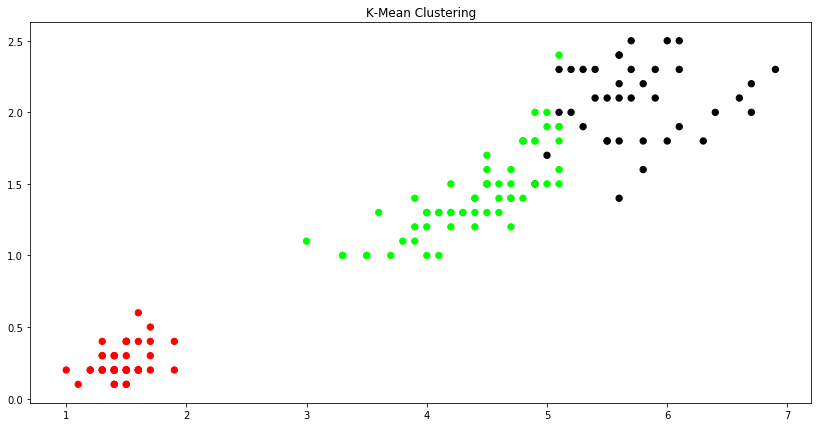

In [41]:
# Build the K-Means Clustering Model
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(attributes)
# This is the K-Means Clustering result
print(model.labels_)

#Visualise the classifier results
# Set the size of the plot
plt.figure(figsize=(14,7))
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
plt.scatter(attributes.Petal_Length, attributes.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Mean Clustering')

## DBSCAN Clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

   Petal_Length  Petal_Width
0           1.4          0.2
1           1.4          0.2
2           1.3          0.2
3           1.5          0.2
4           1.4          0.2
5           1.7          0.4
6           1.4          0.3
7           1.5          0.2
8           1.4          0.2
9           1.5          0.1
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


Text(0.5,1,'DBSCAN Clustering')

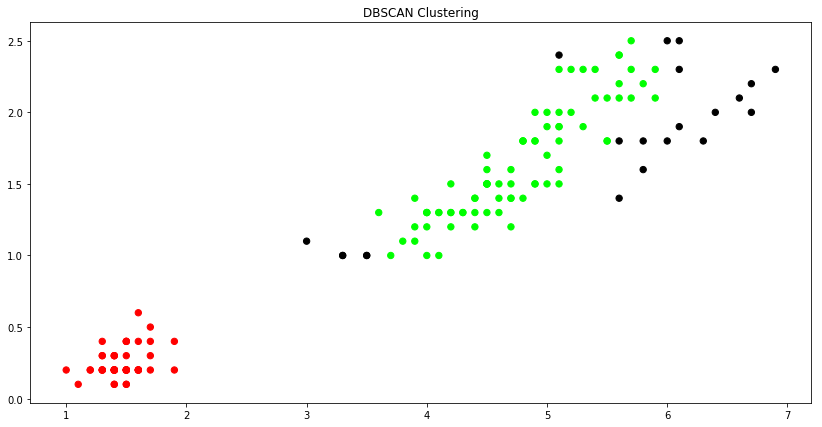

In [39]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# import some data to play with
iris = datasets.load_iris()
attributes = pd.DataFrame(iris.data)
attributes.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
# subset the data with only 2 columns 
attributes=attributes[['Petal_Length','Petal_Width']]
print(attributes.head(10)) # check the data

# Compute DBSCAN
model = DBSCAN(eps=0.3, min_samples=10)
db=model.fit(attributes)
print(db.labels_) #Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

#Visualise the classifier results
# Set the size of the plot
plt.figure(figsize=(14,7))
# Create a colormap
colormap = np.array(['red',"lime",'black']) # more color choices https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(attributes.Petal_Length, attributes.Petal_Width, c=colormap[db.labels_], s=40)
plt.title('DBSCAN Clustering')

# More clustering methods 
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

# Lab 3 Tasks

### Hand-in 
•	Please collect your answers in a single .ipynb or .py file called lab3_yourname.ipynb or lab3_yourname.py <br>
•	Submit all the code and data files to the assignment folder called “Lab 3”. Notice that if you are using exisiting GIS shapefile, you should upload all the associated files with the same name not just the .shp file.<br>
•	Include appropriate comments to explain what each line or block of code accomplishes. You must comment your code for full credit. <br>

Question (1) Finish your code for computing the area, the centriod, and the minimum bounding envelop of a simple polygon.  <br>
Question (2) In lab2, you created python scripts to collect 1000 geotagged tweets based on your interested hashtags/keywords and the geographic region using the Twitter Search API, save the data in the JSON format. In this lab, you need to incoprate a self-defined area unit (i.e., a polygon) using WKT or GeoJSON format or an exisiting geographic boundnary "Shapefile" in GIS format to spatially extract those geotagged tweets within this polygon and save them as a point set.<br>
Question (3) Perform the K-means and the DBSCAN spatial clustering analysis on your geotagged tweets (i.e., the point set extracted from the question 2); comment on your identified patterns. 

## Due Date: Two weeks later (March. 14, 2019)